# Predictive Model

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from yellowbrick.classifier import ConfusionMatrix


In [3]:
df = pd.read_csv("/Users/leoking/Desktop/filtered.csv")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [5]:
Ecco = df

In [6]:
encoder = OneHotEncoder(handle_unknown='ignore')


#one hot encode the sales channel

encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:"Internet", 1:"Mobile"})
Ecco = Ecco.join(encoder_df)


#one hot encode the trip type
encoder_df= pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:"RoundTrip", 1:"OneWayTrip",2:"CircleTrip"})
Ecco = Ecco.join(encoder_df)

In [7]:
 #dropping categorical columns 
Ecco.drop(["sales_channel","trip_type","booking_origin","route"],axis=1, inplace=True)

In [8]:
#store the label for supervised learning
label = df["booking_complete"]

In [9]:
Ecco = Ecco.drop("booking_complete", axis=1)
Ecco

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


# Normalizing the values

In [12]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(Ecco)

In [13]:
#create a data frame for the scaled data
scaled_df = pd.DataFrame(scaled_df,columns=Ecco.columns)

In [14]:
scaled_df["label"] = label
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


# now lets check the Correlation Matrix

<Axes: >

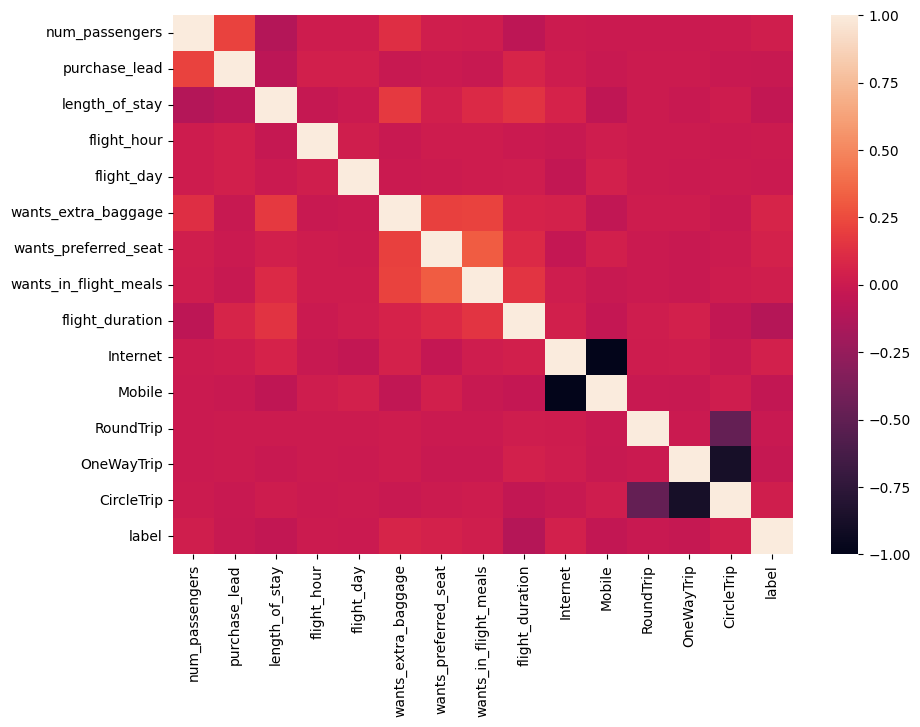

In [17]:
corr = scaled_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr)

# splitting train and test data

In [21]:
X = scaled_df.iloc[:,:-1]
y = scaled_df["label"]

X_train, X_text, y_train, y_text = train_test_split(X.to_numpy(), y.to_numpy(),test_size=0.20, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def precision(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f1(y_true, y_pred):
    return f1_score(y_true, y_pred)


In [31]:
fff_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

# checking training accuracy

In [35]:
# Fit the model on the training data
fff_rf.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = fff_rf.predict(X_train)

# Calculate f1 score, accuracy, and precision for training data
f1_train = round(f1_score(y_train, y_pred_train), 2)
acc_train = round(accuracy_score(y_train, y_pred_train), 2)
pre_train = round(precision_score(y_train, y_pred_train), 2)

# Print the results
print(f"Accuracy, precision, and f1-score for training data are {acc_train}, {pre_train}, and {f1_train} respectively")


Accuracy, precision, and f1-score for training data are 0.93, 1.0, and 0.72 respectively


0.934325

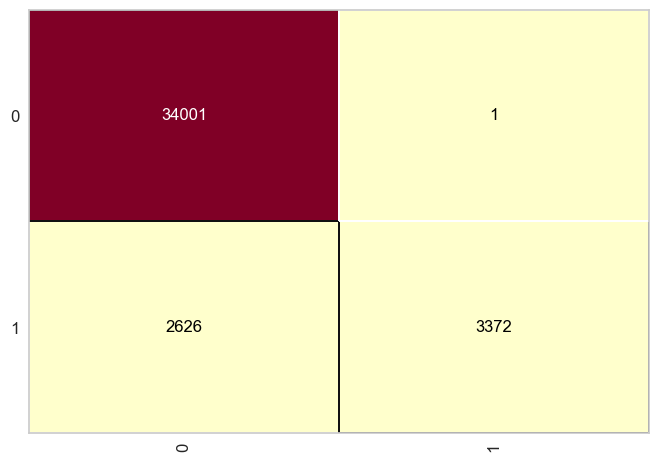

In [37]:
cm = ConfusionMatrix(fff_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

# checking texting accuracy

In [40]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of the classifier and fit the training data
fff_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)
fff_rf.fit(X_train, y_train)  # Fit the model to the training data

# Make predictions on the test data using the predict method
y_pred_test = fff_rf.predict(X_test)

# Calculate f1 score, accuracy, and precision for test data
f1 = round(f1_score(y_test, y_pred_test), 2)
acc = round(accuracy_score(y_test, y_pred_test), 2)
pre = round(precision_score(y_test, y_pred_test), 2)

# Print the results
print(f"Accuracy, precision, and f1-score for test data are {acc}, {pre}, and {f1} respectively")


Accuracy, precision, and f1-score for test data are 0.85, 0.48, and 0.07 respectively


/Users/leoking/anaconda3/envs/recommenders/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8481

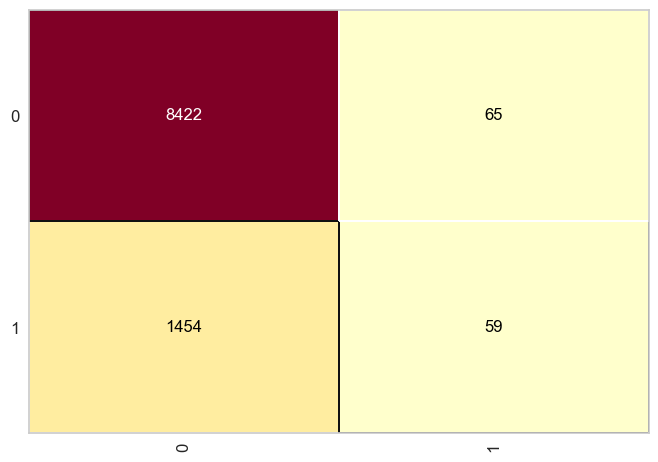

In [41]:
cm = ConfusionMatrix(fff_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

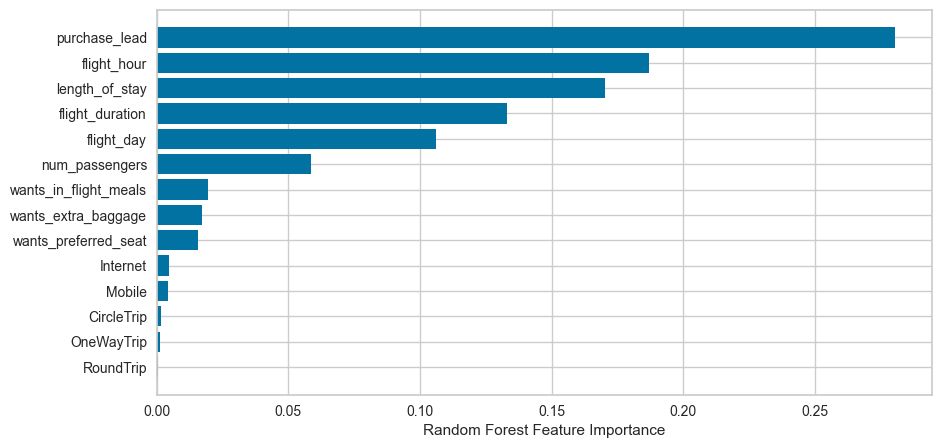

In [42]:
plt.figure(figsize=(10,5))
sorted_idx = fff_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], fff_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

we have a low f1 score and the data is imbalanced.

In [43]:
scaled_df.label.value_counts()

label
0    42522
1     7478
Name: count, dtype: int64

In [44]:
# Create a DataFrame with 8000 samples where the label is 0
scaled_df_0 = scaled_df[scaled_df.label == 0].sample(n=8000)

# Concatenate the two DataFrames, one with all labels as 1 and the other with 8000 samples of label 0
scaled_df_new = pd.concat([scaled_df[scaled_df.label == 1], scaled_df_0], ignore_index=True)

# Shuffle the rows of the resulting DataFrame
scaled_df_new = scaled_df_new.sample(frac=1).reset_index(drop=True)

# Display the resulting DataFrame
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,-0.579559,0.310220,0.234761,0.542005,1.598567,0.703747,1.538654,1.158082,-1.742035,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,0.400684,-0.220457,0.234761,-0.936026,-0.408687,0.703747,-0.649919,1.158082,-1.688589,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
2,-0.579559,-0.507908,-0.532487,-0.936026,1.598567,-1.420965,1.538654,1.158082,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,-0.717967,-0.089844,-1.675042,1.096754,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,-0.579559,0.133327,0.411819,-0.566518,1.096754,0.703747,1.538654,1.158082,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,2.361172,0.177550,-0.148863,-0.566518,1.096754,0.703747,-0.649919,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15474,0.400684,-0.751135,-0.532487,-1.120780,1.598567,-1.420965,-0.649919,-0.863497,-0.572911,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15475,0.400684,-0.706912,-0.561996,0.357251,0.093127,0.703747,-0.649919,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15476,-0.579559,0.144383,-0.502977,-1.120780,-0.910501,0.703747,-0.649919,-0.863497,0.195370,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1


In [46]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

# Create an instance of the classifier and fit the training data
fff_rf = RandomForestClassifier(n_estimators=50, max_depth=50, min_samples_split=5, random_state=0)
fff_rf.fit(X_train, y_train)  # Fit the model to the training data

# Make predictions on the test data
y_pred_test = fff_rf.predict(X_test)

# Calculate f1 score, accuracy, precision, recall, and specificity for test data
f1 = round(f1_score(y_test, y_pred_test), 2)
acc = round(accuracy_score(y_test, y_pred_test), 2)
pre = round(precision_score(y_test, y_pred_test), 2)
recall = round(recall_score(y_test, y_pred_test), 2)
specificity = round(recall_score(y_test, y_pred_test, pos_label=0), 2)

# Print the results
print(f"Accuracy, precision, recall, specificity, and f1-score for test data are {acc}, {pre}, {recall}, {specificity}, and {f1} respectively")


Accuracy, precision, recall, specificity, and f1-score for test data are 0.85, 0.5, 0.04, 0.99, and 0.08 respectively


    The model has a relatively high accuracy, indicating that it correctly predicts the majority of instances.
    Precision is moderate, meaning that when the model predicts positive, it's correct about half of the time.
    Recall is low, suggesting that the model misses many positive instances.
    Specificity is high, indicating that the model is good at correctly identifying negative instances.
    The F1-score is low, indicating that there is room for improvement in terms of balancing precision and recall.

0.8521

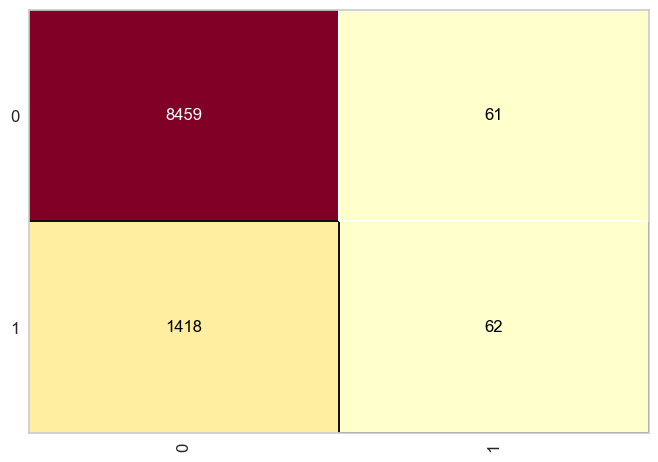

In [47]:
cm = ConfusionMatrix(fff_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

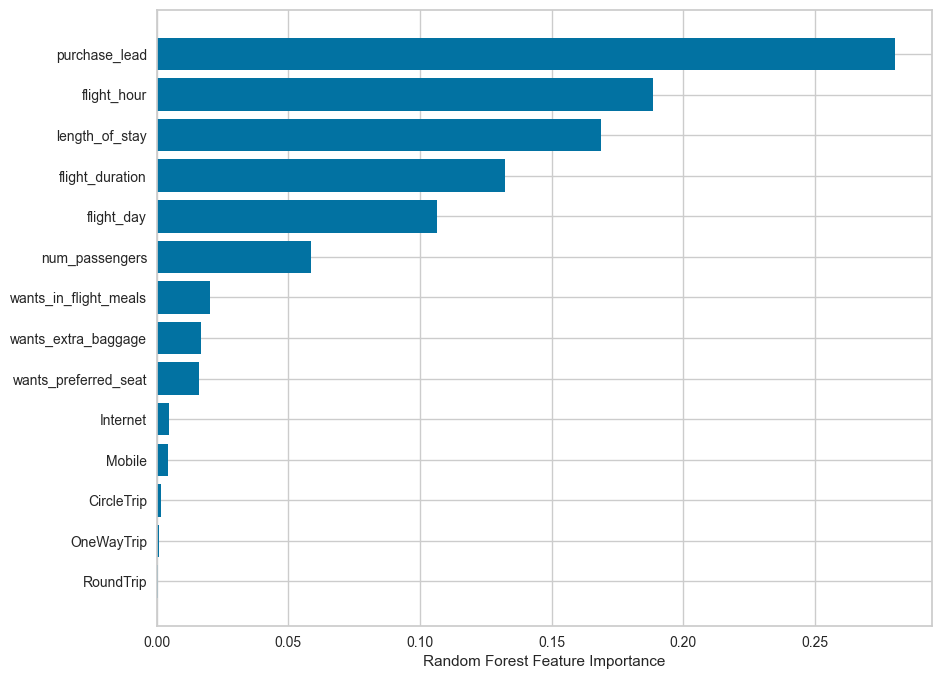

In [48]:
plt.figure(figsize=(10,8))
sorted_idx = fff_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], fff_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")